In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import skew

In [202]:
df = pd.read_csv("cities_by_day.csv")         #importing the dataset
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [203]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8', 'C8H10', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [204]:
df.shape

(29531, 16)

In [205]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  C6H6        23908 non-null  float64
 12  C7H8        21490 non-null  float64
 13  C8H10       11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [207]:
df.isnull().sum()  

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
C6H6           5623
C7H8           8041
C8H10         18109
AQI            4681
AQI_Bucket     4681
dtype: int64

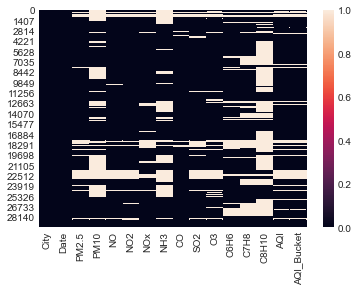

In [208]:
#visualizing the null values using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())

In [209]:
# percentage of data missing 
df.isnull().sum()/df.shape[0] *100

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
C6H6          19.041008
C7H8          27.229014
C8H10         61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

In [210]:
#dropping thw columns which have greater number of null values.
df = df.drop(['C8H10','NH3', 'PM10'], axis = 1 )

In [211]:
df["NO"]=df["NO"].fillna(df.NO2.mean())
df["PM2.5"]=df["PM2.5"].fillna(df['PM2.5'].mean())
df["NO2"]=df["NO2"].fillna(df.NO2.mean())
df["NOx"]=df["NOx"].fillna(df.NOx.mean())
df["CO"]=df["CO"].fillna(df.CO.mean())
df["SO2"]=df["SO2"].fillna(df.SO2.mean())
df["O3"]=df["O3"].fillna(df.O3.mean())
df["C6H6"]=df["C6H6"].fillna(df.C6H6.mean())
df["C7H8"]=df["C7H8"].fillna(df.C7H8.mean())


In [212]:
df.head()


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,NaN,NaN
1,Ahmedabad,1/2/2015,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,NaN,NaN
2,Ahmedabad,1/3/2015,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,NaN,NaN
3,Ahmedabad,1/4/2015,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,NaN,NaN
4,Ahmedabad,1/5/2015,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,NaN,NaN


In [213]:
df.shape

(29531, 13)

In [214]:
df['AQI_Bucket'] = df['AQI_Bucket'].astype('category')

Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: AQI_Bucket, dtype: int64

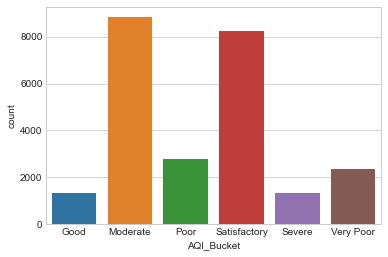

In [215]:
sns.countplot('AQI_Bucket',data=df)
df['AQI_Bucket'].value_counts()

In [216]:
#grouping the aqi by city and calculate average aqi per city
x=pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI', ascending = False).head(10))
x=x.reset_index('City')

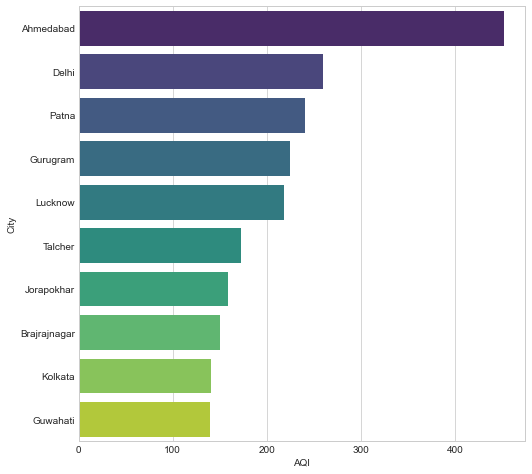

In [217]:
#plot
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,8))
sns.barplot(data= x , x='AQI', y= 'City',orient = 'h' , palette = 'viridis')

In [218]:
#segregating dates into months and years
df['year']=pd.DatetimeIndex(df['Date']).year
df['month']=pd.DatetimeIndex(df['Date']).month
df.head(5)

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket,year,month
0,Ahmedabad,1/1/2015,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,NaN,NaN,2015,1
1,Ahmedabad,1/2/2015,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,NaN,NaN,2015,1
2,Ahmedabad,1/3/2015,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,NaN,NaN,2015,1
3,Ahmedabad,1/4/2015,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,NaN,NaN,2015,1
4,Ahmedabad,1/5/2015,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,NaN,NaN,2015,1


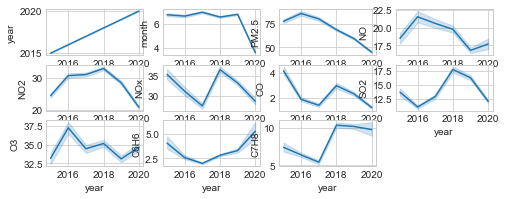

In [219]:
cols = [ 'year','month', 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8']
x= df.iloc[ : , 2:]
fig = plt.figure(figsize=(8,8))
for i , col in enumerate(cols):
    fig.add_subplot(8, 4, i+1)
    sns.lineplot(x='year',y=col , data=x)

In [220]:
#correlation analysis
df.corr(method = 'pearson')

,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,year,month
PM2.5,1.000000,0.419048,0.344341,0.380725,0.086663,0.119512,0.155330,0.021934,0.107788,0.654743,-0.205133,0.040526
NO,0.419048,1.000000,0.456067,0.737791,0.198676,0.162788,0.012467,0.026903,0.118742,0.447082,-0.050623,0.030438
NO2,0.344341,0.456067,1.000000,0.574190,0.353237,0.382758,0.285448,0.025082,0.254074,0.535325,-0.061678,0.034418
NOx,0.380725,0.737791,0.574190,1.000000,0.225097,0.208355,0.083063,0.037383,0.168780,0.474232,-0.017076,0.025299
CO,0.086663,0.198676,0.353237,0.225097,1.000000,0.472583,0.039787,0.061351,0.274882,0.678351,-0.060840,-0.000168
SO2,0.119512,0.162788,0.382758,0.208355,0.472583,1.000000,0.156610,0.033059,0.265522,0.484797,0.037703,-0.026382
O3,0.155330,0.012467,0.285448,0.083063,0.039787,0.156610,1.000000,0.018748,0.113683,0.193988,-0.018367,-0.081038
C6H6,0.021934,0.026903,0.025082,0.037383,0.061351,0.033059,0.018748,1.000000,0.694691,0.043354,0.036206,-0.012848
C7H8,0.107788,0.118742,0.254074,0.168780,0.274882,0.265522,0.113683,0.694691,1.000000,0.266785,0.082403,0.010406
AQI,0.654743,0.447082,0.535325,0.474232,0.678351,0.484797,0.193988,0.043354,0.266785,1.000000,-0.192464,0.022163


Text(0.5, 1.0, 'Correlation Analysis')

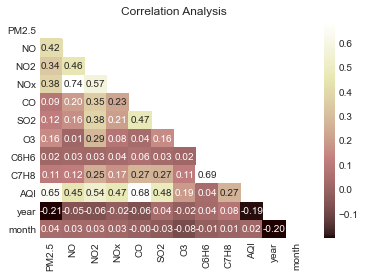

In [221]:
mask = np.triu(df.corr(method = 'pearson'))
sns.heatmap(df.corr(method = 'pearson'),annot = True , fmt = '0.2f', mask = mask, robust = True , cmap = 'pink')
plt.title('Correlation Analysis')

Text(0.5, 0, 'Features')

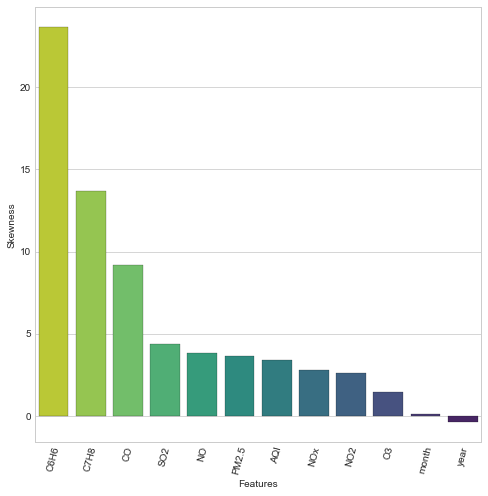

In [222]:
#analysing skewness in data 
skew = pd.DataFrame(df.skew().sort_values(ascending = False))
skew.columns = ['Skewness']

plt.figure(figsize = (8,8))
plt.xticks(rotation =75)
sns.barplot(x=skew.index , y = 'Skewness', data = skew, edgecolor = 'black', linewidth=0.2 , palette = 'viridis_r')
plt.xlabel('Features')

In [223]:
df.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [224]:
#plotting the average AQI ove years which have AQI greater than 500
df['City'][df['AQI']>= 500].value_counts()
cols = ['Ahmedabad','Amritsar', 'Bengaluru','Bhopal','Chandigarh', 'Chennai','Hyderabad','Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong']

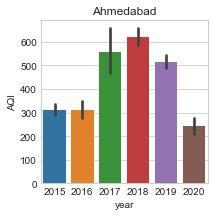

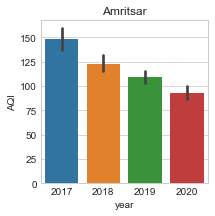

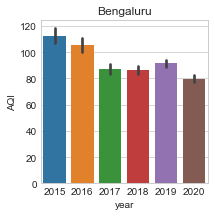

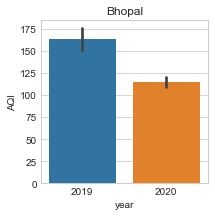

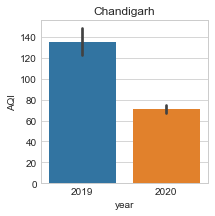

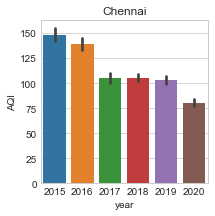

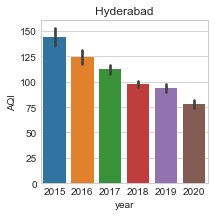

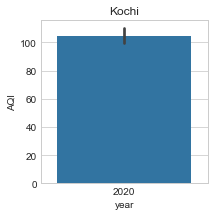

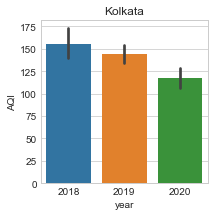

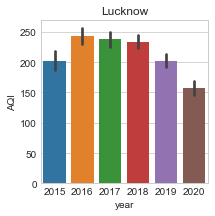

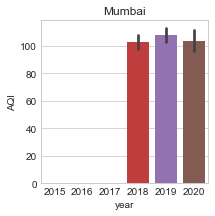

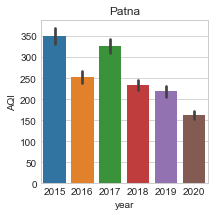

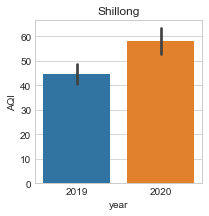

In [225]:
for col in cols:
    plt.figure(figsize= (3,3))
    x=df[df['City']== col]
    sns.barplot(x='year', y = 'AQI', data=x)
    plt.title(col)

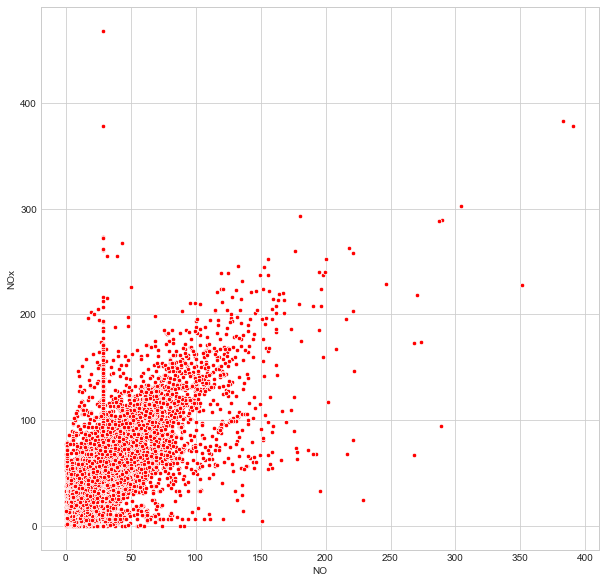

In [226]:
plt.figure(figsize=(10,10))
sns.scatterplot(x ='NO',y='NOx',data=df , s=20, color = 'red')

In [227]:
cols = [ 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8']

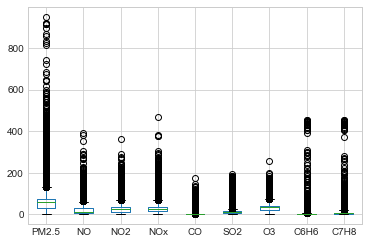

In [228]:
boxplot = df.boxplot(column = cols)

We need to remove outliers from PM2.5 , NO , NO2 , NOx , O3 , C6H6 , C7H8

In [229]:
df.NO.describe()

count    29531.000000
mean        18.907282
std         21.658263
min          0.020000
25%          6.210000
50%         11.530000
75%         28.560659
max        390.680000
Name: NO, dtype: float64

In [230]:
df.C6H6.describe()

count    29531.000000
mean         3.280840
std         14.226364
min          0.000000
25%          0.240000
50%          1.840000
75%          3.280840
max        455.030000
Name: C6H6, dtype: float64

In [231]:
df.C7H8.describe()

count    29531.000000
mean         8.700972
std         17.034769
min          0.000000
25%          1.280000
50%          6.930000
75%          8.700972
max        454.850000
Name: C7H8, dtype: float64

In [232]:
df.O3.describe()

count    29531.000000
mean        34.491430
std         20.163443
min          0.010000
25%         20.740000
50%         34.491430
75%         42.730000
max        257.730000
Name: O3, dtype: float64

In [233]:
df.NOx.describe()

count    29531.000000
mean        32.309123
std         29.317936
min          0.000000
25%         14.670000
50%         27.550000
75%         36.015000
max        467.630000
Name: NOx, dtype: float64

In [234]:
df.NO2.describe()

count    29531.000000
mean        28.560659
std         22.941051
min          0.010000
25%         12.980000
50%         25.240000
75%         34.665000
max        362.210000
Name: NO2, dtype: float64

In [235]:
df['PM2.5'].describe()

count    29531.000000
mean        67.450578
std         59.414476
min          0.040000
25%         32.150000
50%         58.030000
75%         72.450000
max        949.990000
Name: PM2.5, dtype: float64

# REMOVING THE OUTLIERS                                  #Using Z-Score   Z=(X-mean)/Std

In [236]:
df['zscore_NO']=(df.NO - df.NO.mean()) /df.NO.std()
df['zscore_NO2']=(df.NO2 - df.NO2.mean()) /df.NO2.std()
df['zscore_NOx']=(df.NOx - df.NOx.mean()) /df.NOx.std()
df['zscore_PM2.5']=(df['PM2.5'] - df['PM2.5'].mean()) /df['PM2.5'].std()
df['zscore_C6H6']=(df.C6H6 - df.C6H6.mean()) /df.C6H6.std()
df['zscore_C7H8']=(df.C7H8 - df.C7H8.mean()) /df.C7H8.std()
df['zscore_O3']=(df.O3 - df.O3.mean()) /df.O3.std()

# Removing outliers for NO

In [237]:
df[df['zscore_NO']>3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3
6,Ahmedabad,1/7/2015,67.450578,112.16,40.62,130.77,112.16,32.280000,33.47000,0.00,...,NaN,2015,1,4.305642,0.525666,3.358384,-7.127614e-14,-0.230617,-5.107772e-01,-5.065754e-02
10,Ahmedabad,1/11/2015,67.450578,132.07,55.80,24.53,132.07,25.030000,6.79000,0.00,...,NaN,2015,1,5.224921,1.187362,-0.265337,-7.127614e-14,-0.230617,-5.107772e-01,-1.373844e+00
298,Ahmedabad,10/26/2015,206.890000,145.32,55.67,201.00,145.32,20.470000,38.00000,1.69,...,Severe,2015,10,5.836697,1.181696,5.753846,2.346893e+00,-0.111823,-3.082503e-01,1.740065e-01
565,Ahmedabad,7/19/2016,41.390000,100.77,54.70,48.42,100.77,15.750000,34.49143,0.00,...,Severe,2016,7,3.779745,1.139413,0.549523,-4.386234e-01,-0.230617,-5.107772e-01,1.085366e-13
575,Ahmedabad,7/29/2016,46.190000,86.72,29.66,116.39,86.72,14.310000,4.77000,5.50,...,Severe,2016,7,3.131032,0.047920,2.867899,-3.578350e-01,0.155989,1.061302e+00,-1.474026e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26859,Talcher,3/26/2020,64.410000,150.78,5.79,3.98,2.59,0.010000,40.54000,0.00,...,Moderate,2020,3,6.088795,-0.992573,-0.966273,-5.117571e-02,-0.230617,8.310981e-14,2.999770e-01
26867,Talcher,4/3/2020,34.170000,85.48,5.83,7.75,2.02,14.531977,106.75000,0.00,...,NaN,2020,4,3.073779,-0.990829,-0.837683,-5.601426e-01,-0.230617,8.310981e-14,3.583642e+00
26924,Talcher,5/30/2020,20.120000,88.20,20.72,28.91,1.70,24.770000,34.49143,0.00,...,Satisfactory,2020,5,3.199366,-0.341774,-0.115940,-7.966169e-01,-0.230617,8.310981e-14,1.085366e-13
28672,Visakhapatnam,2/24/2018,86.820000,85.97,90.43,117.99,1.71,29.370000,20.95000,11.15,...,Moderate,2018,2,3.096403,2.696883,2.922473,3.260051e-01,0.553139,1.498642e+00,-6.715832e-01


In [238]:
df[df['zscore_NO']<-3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3


In [239]:
df_no_outliers = df[(df.zscore_NO>-3) & (df.zscore_NO<3)]
df_no_outliers.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3
0,Ahmedabad,1/1/2015,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,...,NaN,2015,1,-0.830504,-0.450749,-0.517060,-7.127614e-14,-0.230617,-0.509603,4.903357
1,Ahmedabad,1/2/2015,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,...,NaN,2015,1,-0.828196,-0.561032,-0.540595,-7.127614e-14,0.028058,-0.187908,-0.021397
2,Ahmedabad,1/3/2015,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,...,NaN,2015,1,-0.069594,-0.403672,-0.088994,-7.127614e-14,0.247369,0.451960,-0.188035
3,Ahmedabad,1/4/2015,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,...,NaN,2015,1,-0.794490,-0.439416,-0.489090,-7.127614e-14,0.080777,0.084476,0.078785
4,Ahmedabad,1/5/2015,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,...,NaN,2015,1,0.147413,-0.311261,0.185923,-7.127614e-14,0.262130,0.598131,0.238976


In [240]:
df_no_outliers.shape

(28884, 22)

In [241]:
df.shape[0]- df_no_outliers.shape[0]              #we removed 647 outliers

647

# REMOVING OUTLIERS FOR PM2.5    

In [242]:
df[df['zscore_PM2.5']>3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3
667,Ahmedabad,10/29/2016,381.69,29.49,25.41,54.900000,29.49,49.33,15.74,13.10000,...,Severe,2016,10,0.488623,-0.137337,7.705480e-01,5.288937,6.902087e-01,1.142312e+00,-0.929972
669,Ahmedabad,10/31/2016,271.85,16.39,15.28,31.680000,16.39,33.31,41.24,3.52000,...,Severe,2016,10,-0.116227,-0.578904,-2.145865e-02,3.440229,1.681102e-02,-5.340376e-03,0.334693
1280,Ahmedabad,7/4/2018,302.08,27.20,28.10,34.000000,27.20,46.94,0.88,5.26000,...,Severe,2018,7,0.382889,-0.020080,5.767380e-02,3.949028,1.391192e-01,2.038714e+00,-1.666949
3141,Amritsar,5/6/2017,296.84,13.41,16.92,32.309123,0.00,15.32,15.81,3.28084,...,Moderate,2017,5,-0.253819,-0.507416,-2.593227e-14,3.860834,-1.273610e-14,8.310981e-14,-0.926500
3143,Amritsar,5/8/2017,868.66,13.21,16.46,32.309123,0.00,27.92,15.99,3.28084,...,Moderate,2017,5,-0.263054,-0.527468,-2.593227e-14,13.485088,-1.273610e-14,8.310981e-14,-0.917573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25730,Shillong,9/4/2019,274.92,1.28,3.63,1.440000,0.28,5.14,19.11,0.26000,...,NaN,2019,9,-0.813883,-1.086727,-1.052909e+00,3.491900,-2.123410e-01,-4.274183e-01,-0.762837
26106,Talcher,3/4/2018,283.31,173.68,36.38,185.730000,3.30,52.69,30.91,0.00000,...,Severe,2018,3,7.146128,0.340845,5.233004e+00,3.633112,-2.306169e-01,-5.107772e-01,-0.177620
26122,Talcher,3/20/2018,331.81,140.16,43.96,184.130000,3.34,4.21,36.52,0.00000,...,NaN,2018,3,5.598451,0.671257,5.178430e+00,4.449411,-2.306169e-01,-5.107772e-01,0.100606
26797,Talcher,1/24/2020,342.42,19.21,7.29,19.000000,1.45,10.28,28.36,0.00000,...,NaN,2020,1,0.013977,-0.927188,-4.539584e-01,4.627987,-2.306169e-01,8.310981e-14,-0.304086


In [243]:
df[df['zscore_PM2.5'] <-3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3


In [245]:
df_no_outliers = df[(df['zscore_PM2.5']>-3)&(df['zscore_PM2.5']<3)]
df_no_outliers.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3
0,Ahmedabad,1/1/2015,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,...,NaN,2015,1,-0.830504,-0.450749,-0.517060,-7.127614e-14,-0.230617,-0.509603,4.903357
1,Ahmedabad,1/2/2015,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,...,NaN,2015,1,-0.828196,-0.561032,-0.540595,-7.127614e-14,0.028058,-0.187908,-0.021397
2,Ahmedabad,1/3/2015,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,...,NaN,2015,1,-0.069594,-0.403672,-0.088994,-7.127614e-14,0.247369,0.451960,-0.188035
3,Ahmedabad,1/4/2015,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,...,NaN,2015,1,-0.794490,-0.439416,-0.489090,-7.127614e-14,0.080777,0.084476,0.078785
4,Ahmedabad,1/5/2015,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,...,NaN,2015,1,0.147413,-0.311261,0.185923,-7.127614e-14,0.262130,0.598131,0.238976


In [246]:
df_no_outliers.shape

(28916, 22)

In [247]:
 df.shape[0]- df_no_outliers.shape[0]     #  Hence  615 outliers are remove

615

# Removing outliers for NO2

In [248]:
df[df['zscore_NO2']>3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3
1041,Ahmedabad,11/7/2017,72.670000,42.990000,108.74,85.130000,42.990000,106.41,27.74,33.58000,...,Severe,2017,11,1.111941,3.495016,1.801657e+00,8.784765e-02,2.129789e+00,6.359876e+00,-0.334835
1042,Ahmedabad,11/8/2017,94.320000,62.880000,105.75,98.510000,62.880000,127.84,55.03,45.36000,...,Severe,2017,11,2.030298,3.364682,2.258033e+00,4.522370e-01,2.957830e+00,9.689537e+00,1.018604
1043,Ahmedabad,11/9/2017,89.000000,38.800000,119.82,87.410000,38.800000,131.99,42.90,40.31000,...,Severe,2017,11,0.918482,3.977993,1.879425e+00,3.626965e-01,2.602855e+00,8.435044e+00,0.417021
1044,Ahmedabad,11/10/2017,85.350000,48.640000,105.07,87.550000,48.640000,111.22,62.31,35.32000,...,Severe,2017,11,1.372812,3.335041,1.884201e+00,3.012637e-01,2.252098e+00,7.884405e+00,1.379654
1045,Ahmedabad,11/11/2017,101.250000,51.700000,106.82,90.690000,51.700000,113.03,58.29,34.08000,...,Severe,2017,11,1.514097,3.411323,1.991302e+00,5.688752e-01,2.164936e+00,7.392470e+00,1.180283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26307,Talcher,9/21/2018,67.450578,28.560659,104.97,32.309123,2.248598,3.15,20.00,3.28084,...,NaN,2018,9,0.445713,3.330682,-2.593227e-14,-7.127614e-14,-1.273610e-14,8.310981e-14,-0.718698
26331,Talcher,10/15/2018,67.450578,28.560659,97.79,32.309123,2.248598,17.31,11.27,3.28084,...,Good,2018,10,0.445713,3.017706,-2.593227e-14,-7.127614e-14,-1.273610e-14,8.310981e-14,-1.151660
28983,Visakhapatnam,1/1/2019,131.600000,24.580000,103.42,74.990000,1.260000,31.00,61.02,6.26000,...,Poor,2019,1,0.261919,3.263117,1.455794e+00,1.079693e+00,2.094112e-01,8.682407e-02,1.315677
28985,Visakhapatnam,1/3/2019,148.040000,25.440000,103.90,75.950000,1.380000,29.16,93.29,5.72000,...,Very Poor,2019,1,0.301627,3.284041,1.488538e+00,1.356394e+00,1.714535e-01,5.336309e-02,2.916098


In [249]:
df[df['zscore_NO2']<-3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3


In [250]:
df_no_outliers = df[(df.zscore_NO2>-3) & (df.zscore_NO2<3)]
df_no_outliers.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3
0,Ahmedabad,1/1/2015,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,...,NaN,2015,1,-0.830504,-0.450749,-0.517060,-7.127614e-14,-0.230617,-0.509603,4.903357
1,Ahmedabad,1/2/2015,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,...,NaN,2015,1,-0.828196,-0.561032,-0.540595,-7.127614e-14,0.028058,-0.187908,-0.021397
2,Ahmedabad,1/3/2015,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,...,NaN,2015,1,-0.069594,-0.403672,-0.088994,-7.127614e-14,0.247369,0.451960,-0.188035
3,Ahmedabad,1/4/2015,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,...,NaN,2015,1,-0.794490,-0.439416,-0.489090,-7.127614e-14,0.080777,0.084476,0.078785
4,Ahmedabad,1/5/2015,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,...,NaN,2015,1,0.147413,-0.311261,0.185923,-7.127614e-14,0.262130,0.598131,0.238976


In [251]:
df_no_outliers.shape

(29001, 22)

In [253]:
df.shape[0]- df_no_outliers.shape[0]                # hence 530 outliers are removed

530

# Removing outliers for NOx

In [254]:
df[df['zscore_NOx']>3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3
6,Ahmedabad,1/7/2015,67.450578,112.16,40.62,130.77,112.16,32.28,33.47,0.00,...,NaN,2015,1,4.305642,0.525666,3.358384,-7.127614e-14,-0.230617,-5.107772e-01,-0.050658
53,Ahmedabad,2/23/2015,238.410000,77.70,55.07,131.32,77.70,89.07,37.30,50.61,...,Severe,2015,2,2.714563,1.155542,3.377143,2.877404e+00,3.326863,9.095458e+00,0.139290
298,Ahmedabad,10/26/2015,206.890000,145.32,55.67,201.00,145.32,20.47,38.00,1.69,...,Severe,2015,10,5.836697,1.181696,5.753846,2.346893e+00,-0.111823,-3.082503e-01,0.174006
1029,Ahmedabad,10/26/2017,112.250000,104.94,36.61,141.28,104.94,43.78,23.60,21.01,...,Severe,2017,10,3.972282,0.350871,3.716867,7.540153e-01,1.246219,2.517735e+00,-0.540157
1030,Ahmedabad,10/27/2017,133.070000,70.84,51.06,121.90,70.84,61.91,32.46,22.32,...,Severe,2017,10,2.397825,0.980746,3.055838,1.104435e+00,1.338301,2.734350e+00,-0.100748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26742,Talcher,11/30/2019,100.740000,246.66,28.59,228.96,1.40,37.86,16.70,0.39,...,Very Poor,2019,11,10.515743,0.001279,6.707528,5.602914e-01,-0.203203,8.310981e-14,-0.882361
26743,Talcher,12/1/2019,83.180000,215.42,33.72,195.69,1.02,44.80,23.00,0.00,...,Poor,2019,12,9.073337,0.224896,5.572728,2.647406e-01,-0.230617,8.310981e-14,-0.569914
26744,Talcher,12/2/2019,81.480000,161.94,41.18,152.30,0.99,36.63,26.96,0.00,...,Moderate,2019,12,6.604072,0.550077,4.092746,2.361280e-01,-0.230617,8.310981e-14,-0.373519
26745,Talcher,12/3/2019,103.150000,196.80,39.88,207.65,1.57,30.74,20.63,0.00,...,Poor,2019,12,8.213619,0.493410,5.980669,6.008539e-01,-0.230617,8.310981e-14,-0.687454


In [255]:
df[df['zscore_NOx']<-3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3


In [256]:
df_no_outliers = df[(df.zscore_NOx>-3) & (df.zscore_NOx<3)]
df_no_outliers.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3
0,Ahmedabad,1/1/2015,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,...,NaN,2015,1,-0.830504,-0.450749,-0.517060,-7.127614e-14,-0.230617,-0.509603,4.903357
1,Ahmedabad,1/2/2015,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,...,NaN,2015,1,-0.828196,-0.561032,-0.540595,-7.127614e-14,0.028058,-0.187908,-0.021397
2,Ahmedabad,1/3/2015,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,...,NaN,2015,1,-0.069594,-0.403672,-0.088994,-7.127614e-14,0.247369,0.451960,-0.188035
3,Ahmedabad,1/4/2015,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,...,NaN,2015,1,-0.794490,-0.439416,-0.489090,-7.127614e-14,0.080777,0.084476,0.078785
4,Ahmedabad,1/5/2015,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,...,NaN,2015,1,0.147413,-0.311261,0.185923,-7.127614e-14,0.262130,0.598131,0.238976


In [257]:
df_no_outliers.shape

(28872, 22)

In [259]:
df.shape[0]- df_no_outliers.shape[0]      #hence 659  outliers are removed

659

# Removing outliers for O3

In [260]:
df[df['zscore_O3']>3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3
0,Ahmedabad,1/1/2015,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,...,NaN,2015,1,-0.830504,-0.450749,-0.517060,-7.127614e-14,-0.230617,-0.509603,4.903357
29,Ahmedabad,1/30/2015,79.840000,13.85,28.68,41.08,13.85,48.49,97.07,0.04,...,Very Poor,2015,1,-0.233504,0.005202,0.299164,2.085253e-01,-0.227805,-0.510777,3.103566
30,Ahmedabad,1/31/2015,94.520000,24.39,32.66,52.61,24.39,67.39,111.33,0.24,...,Severe,2015,1,0.253147,0.178690,0.692439,4.556031e-01,-0.213747,-0.510190,3.810786
31,Ahmedabad,2/1/2015,135.990000,43.48,42.08,84.57,43.48,75.23,102.70,0.40,...,Severe,2015,2,1.134566,0.589308,1.782556,1.153581e+00,-0.202500,-0.508429,3.382784
32,Ahmedabad,2/2/2015,178.330000,54.56,35.31,72.80,54.56,55.04,107.38,0.46,...,Severe,2015,2,1.646149,0.294204,1.381096,1.866202e+00,-0.198283,-0.507255,3.614887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,Visakhapatnam,1/13/2019,120.200000,14.84,57.30,42.55,1.02,15.43,96.41,4.65,...,Poor,2019,1,-0.187794,1.252747,0.349304,8.878210e-01,0.096241,-0.092809,3.070833
28998,Visakhapatnam,1/16/2019,67.450578,2.43,17.39,11.22,0.88,12.00,153.41,2.47,...,Poor,2019,1,-0.760785,-0.486929,-0.719325,-7.127614e-14,-0.056996,-0.342298,5.897731
28999,Visakhapatnam,1/17/2019,102.420000,5.70,29.75,20.46,0.96,14.97,128.67,3.05,...,Moderate,2019,1,-0.609803,0.051843,-0.404160,5.885674e-01,-0.016226,-0.220782,4.670758
29000,Visakhapatnam,1/18/2019,126.400000,16.19,58.08,44.05,1.12,20.40,109.19,4.08,...,Poor,2019,1,-0.125462,1.286748,0.400467,9.921727e-01,0.056175,-0.139184,3.704653


In [261]:
df[df['zscore_O3']<-3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3


In [262]:
df_no_outliers = df[(df.zscore_O3>-3) & (df.zscore_O3<3)]
df_no_outliers.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3
1,Ahmedabad,1/2/2015,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,...,NaN,2015,1,-0.828196,-0.561032,-0.540595,-7.127614e-14,0.028058,-0.187908,-0.021397
2,Ahmedabad,1/3/2015,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,...,NaN,2015,1,-0.069594,-0.403672,-0.088994,-7.127614e-14,0.247369,0.451960,-0.188035
3,Ahmedabad,1/4/2015,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,...,NaN,2015,1,-0.794490,-0.439416,-0.489090,-7.127614e-14,0.080777,0.084476,0.078785
4,Ahmedabad,1/5/2015,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,...,NaN,2015,1,0.147413,-0.311261,0.185923,-7.127614e-14,0.262130,0.598131,0.238976
5,Ahmedabad,1/6/2015,67.450578,45.41,38.48,81.50,45.41,45.76,46.51,5.42,...,NaN,2015,1,1.223677,0.432384,1.677842,-7.127614e-14,0.150366,0.124981,0.596057


In [263]:
df_no_outliers.shape

(29099, 22)

In [265]:
df.shape[0]- df_no_outliers.shape[0]       #hence 432 outliers are removed

432

# Removing outliers for C6H6

In [266]:
df[df['zscore_C6H6']>3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3
53,Ahmedabad,2/23/2015,238.41,77.70,55.07,131.32,77.70,89.07,37.30000,50.61,...,Severe,2015,2,2.714563,1.155542,3.377143,2.877404,3.326863,9.095458,1.392902e-01
305,Ahmedabad,11/2/2015,122.54,75.42,44.20,119.62,75.42,13.78,60.66000,73.38,...,NaN,2015,11,2.609291,0.681719,2.978070,0.927205,4.927412,5.657196,1.297822e+00
1048,Ahmedabad,11/14/2017,207.19,118.02,146.18,159.36,118.02,160.06,37.21000,63.79,...,Severe,2017,11,4.576208,5.127025,4.333555,2.351942,4.253312,-0.380456,1.348267e-01
1049,Ahmedabad,11/15/2017,148.83,45.88,29.79,48.57,45.88,113.64,36.02000,49.70,...,Severe,2017,11,1.245378,0.053587,0.554639,1.369690,3.262897,-0.413329,7.580895e-02
1164,Ahmedabad,3/10/2018,114.06,52.37,131.09,118.44,52.37,82.54,56.94000,56.27,...,Severe,2018,3,1.545032,4.469252,2.937822,0.784479,3.724716,5.809238,1.113330e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25924,Shillong,3/16/2020,23.18,0.86,2.53,1.04,0.21,5.40,36.23000,281.93,...,Satisfactory,2020,3,-0.833275,-1.134676,-1.066553,-0.745114,19.586816,16.034208,8.622384e-02
25925,Shillong,3/17/2020,37.88,0.96,2.69,1.05,0.31,6.19,6.77000,50.59,...,Good,2020,3,-0.828658,-1.127702,-1.066212,-0.497700,3.325457,2.465489,-1.374836e+00
25990,Shillong,5/21/2020,3.45,0.88,2.58,1.06,0.17,7.77,34.49143,98.96,...,Good,2020,5,-0.832351,-1.132496,-1.065870,-1.077188,6.725483,5.301453,1.085366e-13
25991,Shillong,5/22/2020,8.58,0.99,2.84,1.14,0.22,8.62,1.45000,205.43,...,Good,2020,5,-0.827272,-1.121163,-1.063142,-0.990846,14.209475,11.548676,-1.638680e+00


In [267]:
df[df['zscore_C6H6']<-3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3


In [268]:
df_no_outliers = df[(df.zscore_C6H6>-3) & (df.zscore_C6H6<3)]
df_no_outliers.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3
0,Ahmedabad,1/1/2015,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,...,NaN,2015,1,-0.830504,-0.450749,-0.517060,-7.127614e-14,-0.230617,-0.509603,4.903357
1,Ahmedabad,1/2/2015,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,...,NaN,2015,1,-0.828196,-0.561032,-0.540595,-7.127614e-14,0.028058,-0.187908,-0.021397
2,Ahmedabad,1/3/2015,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,...,NaN,2015,1,-0.069594,-0.403672,-0.088994,-7.127614e-14,0.247369,0.451960,-0.188035
3,Ahmedabad,1/4/2015,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,...,NaN,2015,1,-0.794490,-0.439416,-0.489090,-7.127614e-14,0.080777,0.084476,0.078785
4,Ahmedabad,1/5/2015,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,...,NaN,2015,1,0.147413,-0.311261,0.185923,-7.127614e-14,0.262130,0.598131,0.238976


In [269]:
df_no_outliers.shape

(29421, 22)

In [271]:
df.shape[0]- df_no_outliers.shape[0]            #hence 110  outliers are removed

110

# Removing outliers for C7H8

In [272]:
df[df['zscore_C7H8']>3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3
53,Ahmedabad,2/23/2015,238.41,77.70,55.07,131.32,77.70,89.07,37.30000,50.61,...,Severe,2015,2,2.714563,1.155542,3.377143,2.877404,3.326863,9.095458,1.392902e-01
77,Ahmedabad,3/19/2015,105.06,46.24,37.05,82.23,46.24,53.62,45.65000,20.89,...,Severe,2015,3,1.262000,0.370050,1.702742,0.633001,1.237784,3.913116,5.534060e-01
81,Ahmedabad,3/23/2015,130.76,45.61,41.03,85.76,45.61,65.77,41.58000,24.12,...,Severe,2015,3,1.232911,0.543538,1.823146,1.065556,1.464827,4.497215,3.515555e-01
82,Ahmedabad,3/24/2015,143.55,27.30,31.15,57.16,27.30,50.98,35.38000,18.61,...,Severe,2015,3,0.387507,0.112869,0.847634,1.280823,1.077518,3.761661,4.406834e-02
83,Ahmedabad,3/25/2015,165.07,23.83,34.48,57.71,23.83,64.32,43.79000,29.14,...,Severe,2015,3,0.227291,0.258024,0.866394,1.643024,1.817693,3.246832,4.611598e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25923,Shillong,3/15/2020,27.04,0.88,2.55,1.02,0.21,4.85,44.13000,435.90,...,Satisfactory,2020,3,-0.832351,-1.133804,-1.067235,-0.680147,30.409680,25.080412,4.780220e-01
25924,Shillong,3/16/2020,23.18,0.86,2.53,1.04,0.21,5.40,36.23000,281.93,...,Satisfactory,2020,3,-0.833275,-1.134676,-1.066553,-0.745114,19.586816,16.034208,8.622384e-02
25990,Shillong,5/21/2020,3.45,0.88,2.58,1.06,0.17,7.77,34.49143,98.96,...,Good,2020,5,-0.832351,-1.132496,-1.065870,-1.077188,6.725483,5.301453,1.085366e-13
25991,Shillong,5/22/2020,8.58,0.99,2.84,1.14,0.22,8.62,1.45000,205.43,...,Good,2020,5,-0.827272,-1.121163,-1.063142,-0.990846,14.209475,11.548676,-1.638680e+00


In [273]:
df[df['zscore_C7H8']<-3]

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3


In [274]:
df_no_outliers = df[(df.zscore_C7H8>-3) & (df.zscore_C7H8<3)]
df_no_outliers.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3
0,Ahmedabad,1/1/2015,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,...,NaN,2015,1,-0.830504,-0.450749,-0.517060,-7.127614e-14,-0.230617,-0.509603,4.903357
1,Ahmedabad,1/2/2015,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,...,NaN,2015,1,-0.828196,-0.561032,-0.540595,-7.127614e-14,0.028058,-0.187908,-0.021397
2,Ahmedabad,1/3/2015,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,...,NaN,2015,1,-0.069594,-0.403672,-0.088994,-7.127614e-14,0.247369,0.451960,-0.188035
3,Ahmedabad,1/4/2015,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,...,NaN,2015,1,-0.794490,-0.439416,-0.489090,-7.127614e-14,0.080777,0.084476,0.078785
4,Ahmedabad,1/5/2015,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,...,NaN,2015,1,0.147413,-0.311261,0.185923,-7.127614e-14,0.262130,0.598131,0.238976


In [275]:
df_no_outliers.shape

(29214, 22)

In [278]:
 df.shape[0]- df_no_outliers.shape[0]          #hence 317 outliers are removed

317

In [277]:
df_no_outliers.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,...,AQI_Bucket,year,month,zscore_NO,zscore_NO2,zscore_NOx,zscore_PM2.5,zscore_C6H6,zscore_C7H8,zscore_O3
0,Ahmedabad,1/1/2015,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,...,NaN,2015,1,-0.830504,-0.450749,-0.517060,-7.127614e-14,-0.230617,-0.509603,4.903357
1,Ahmedabad,1/2/2015,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,...,NaN,2015,1,-0.828196,-0.561032,-0.540595,-7.127614e-14,0.028058,-0.187908,-0.021397
2,Ahmedabad,1/3/2015,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,...,NaN,2015,1,-0.069594,-0.403672,-0.088994,-7.127614e-14,0.247369,0.451960,-0.188035
3,Ahmedabad,1/4/2015,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,...,NaN,2015,1,-0.794490,-0.439416,-0.489090,-7.127614e-14,0.080777,0.084476,0.078785
4,Ahmedabad,1/5/2015,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,...,NaN,2015,1,0.147413,-0.311261,0.185923,-7.127614e-14,0.262130,0.598131,0.238976


# Hence all outliers from the dataset are removed